In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

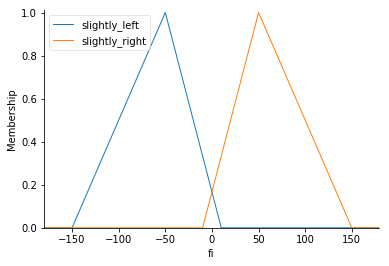

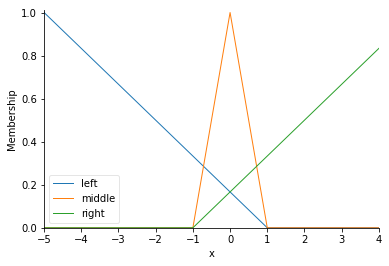

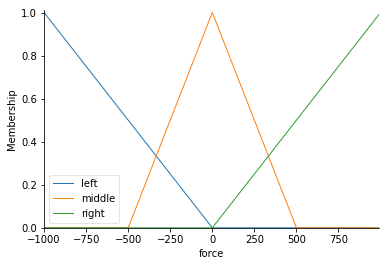

In [56]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
fi = ctrl.Antecedent(np.arange(-180, 180, 1), 'fi')
x = ctrl.Antecedent(np.arange(-5, 5, 1), 'x')
force = ctrl.Consequent(np.arange(-1000, 1000, 10), 'force')

# Auto-membership function population is possible with .automf(3, 5, or 7)

fi['slightly_left'] = fuzz.trimf(fi.universe, [-150, -50, 10])
fi['slightly_right'] = fuzz.trimf(fi.universe, [-10, 50, 150])

x['left'] = fuzz.trimf(x.universe, [-5, -5, 1])
x['middle'] = fuzz.trimf(x.universe, [-0.1, 0, 0.1])
x['right'] = fuzz.trimf(x.universe, [-1, 5, 5])

force['left'] = fuzz.trimf(force.universe, [-1000, -1000, 0])
force['middle'] = fuzz.trimf(force.universe, [-500, 0, 500])
force['right'] = fuzz.trimf(force.universe, [0, 1000, 1000])

fi.view()
x.view()
force.view()

In [57]:
rule1 = ctrl.Rule(x['left'] & fi['slightly_right'], force['left'])
rule2 = ctrl.Rule(x['right'] & fi['slightly_left'], force['right'])
rule3 = ctrl.Rule(x['middle'] | fi['slightly_left'], force['right'])
rule4 = ctrl.Rule(x['middle'] | fi['slightly_right'], force['left'])

In [58]:
force_controler = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
estimated_force = ctrl.ControlSystemSimulation(force_controler)

605.9234234234234


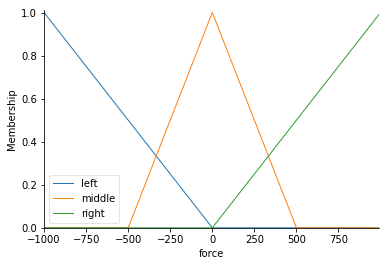

In [67]:
estimated_force.input['x'] = -1
estimated_force.input['fi'] = -20

estimated_force.compute()
print(estimated_force.output['force'])
force.view(slim=estimated_force)

In [60]:
from pendulum_with_PID import Record
import numpy as np
import pandas as pd

In [61]:
r = Record()
r.position_set(20)

In [66]:
r = Record()
r.position_set(20)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]
print(angle, trolley)

for i in range(15):
    estimated_force.input['x'] = 22
    estimated_force.input['fi'] = -30
    print("iteration: %d, force:%0.2f" % (i, estimated_force.output['force']))
    
    r.move([(estimated_force.output['force'], 0.02)], dt_min=0.01)

    angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]
    print("angle: %0.2f   position: %0.2f" % (angle, trolley), end='\n\n')

20.0 0
iteration: 0, force:633.47


angle: 19.58   position: -0.01

iteration: 1, force:633.47
angle: 18.57   position: -0.03



iteration: 2, force:633.47


angle: 16.95   position: -0.06

iteration: 3, force:633.47
angle: 14.72   position: -0.11

iteration: 4, force:633.47


angle: 11.85   position: -0.17

iteration: 5, force:633.47


angle: 8.31   position: -0.24

iteration: 6, force:633.47
angle: 4.10   position: -0.32

iteration: 7, force:633.47


angle: -0.83   position: -0.42

iteration: 8, force:633.47
angle: -6.48   position: -0.53

iteration: 9, force:633.47


angle: -12.87   position: -0.65

iteration: 10, force:633.47
angle: -20.00   position: -0.79



iteration: 11, force:633.47
angle: -27.86   position: -0.93



iteration: 12, force:633.47
angle: -36.42   position: -1.09

iteration: 13, force:633.47


angle: -45.62   position: -1.26

iteration: 14, force:633.47
angle: -55.40   position: -1.44



In [22]:
r.record

,m_1,m_2,l,__x,_x,x,__fi,_fi,fi,g,t
0,20,2,1,0,0,0,0,0,-0.349066,9.81,0
